# Final Project!!

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

This is the beginning of my part of the final project. My sub-metric will be overdose and drug use in Allegheny County.

In [3]:
data = pd.read_csv('Overdose.csv',index_col = 'race',parse_dates = True)
data.head(5)

,death_date_and_time,manner_of_death,age,sex,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
race,,,,,,,,,,,,,,,,,,
W,2007-01-13T15:49:00,Accidents,51,M,MO,Benzodiazepines,Cocaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15120,NaN,2007
W,2007-01-15T16:46:00,Accidents,46,M,MO,Cocaine,Diltiazem,Oxycodone,Quetiapine,Topiramate,Venlafaxine,NaN,NaN,NaN,NaN,15104,NaN,2007
W,2007-01-28T00:41:00,Accidents,43,M,MO,Codeine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15122,NaN,2007
W,2007-03-08T22:53:00,Accidents,26,M,MO,Cocaine,Oxycodone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15220,NaN,2007
W,2007-03-12T13:53:00,Accidents,35,F,MO,Alcohol,Codeine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15216,NaN,2007


In [4]:
query_mask = data['death_date_and_time'].str.contains('2021')
recent_data = data[query_mask]
recent_data.head()

,death_date_and_time,manner_of_death,age,sex,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
race,,,,,,,,,,,,,,,,,,
W,2021-10-07T17:15:00,Accident,33,M,MO,Cocaine,Diazepam,Lorazepam,Fentanyl,Acetyl Fentanyl,Heroin,Para-Fluorofentanyl,Citalopram/Escitalopram,NaN,NaN,15232,NaN,2021
W,2021-10-08T07:20:00,Accident,58,M,MO,Alcohol,Methamphetamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15132,NaN,2021
W,2021-04-17T02:05:00,Accident,33,F,MO,Fentanyl,Cocaine,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15212,NaN,2021
W,2021-04-18T17:48:00,Accident,51,M,MO,Acryl Fentanyl,Fentanyl,Despropionyl Fentanyl 4-ANPP,Para-Fluorofentanyl,NaN,NaN,NaN,NaN,NaN,NaN,15212,NaN,2021
W,2021-09-25T14:39:00,Accident,28,M,MO,Fentanyl,Methamphetamine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15208,NaN,2021


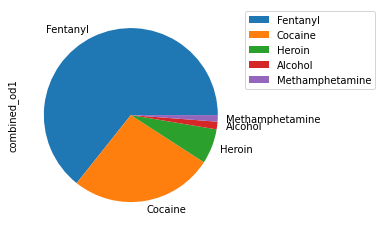

In [17]:
recent_data['combined_od1'].value_counts().head(5).plot(kind='pie')
plt.legend(bbox_to_anchor=(1,1))

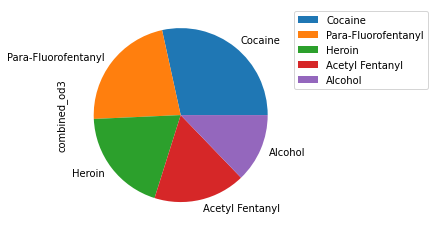

In [16]:
recent_data['combined_od2' and 'combined_od3'].value_counts().head(5).plot(kind='pie')
plt.legend(bbox_to_anchor=(1,1))

In [8]:
recent_data['age'].mean() 

42.73534971644612

In [9]:
print(dict(recent_data['age'].value_counts().sort_values(ascending=False).head(5)))

{37: 21, 35: 21, 31: 19, 34: 18, 33: 17}


In [87]:
recent_data.describe()

,age,combined_od10,decedent_zip,case_year
count,529.000000,0.0,0.0,529.000000
mean,42.735350,NaN,NaN,2020.998110
std,13.248281,NaN,NaN,0.043478
min,0.000000,NaN,NaN,2020.000000
25%,33.000000,NaN,NaN,2021.000000
50%,41.000000,NaN,NaN,2021.000000
75%,54.000000,NaN,NaN,2021.000000
max,79.000000,NaN,NaN,2021.000000


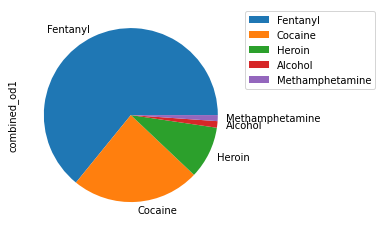

In [15]:
another_query_mask = data['death_date_and_time'].str.contains('2020')
data2020 = data[another_query_mask]
combined_data = data2020.append(recent_data)
combined_data['combined_od1'].value_counts().head(5).plot(kind='pie')
plt.legend(bbox_to_anchor=(1,1))

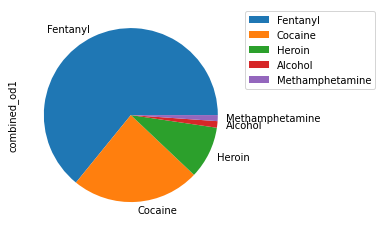

In [18]:
combined_data['combined_od1'].value_counts().head().plot(kind='pie')
plt.legend(bbox_to_anchor=(1,1))

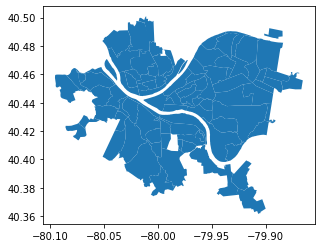

In [19]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [40]:
themap = neighborhoods.merge(combined_data, how='left', left_on='hood', right_on='incident_zip')
themap[['hood','combined_od1','geometry']].head()

,hood,combined_od1,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


IndexError: index 0 is out of bounds for axis 0 with size 0

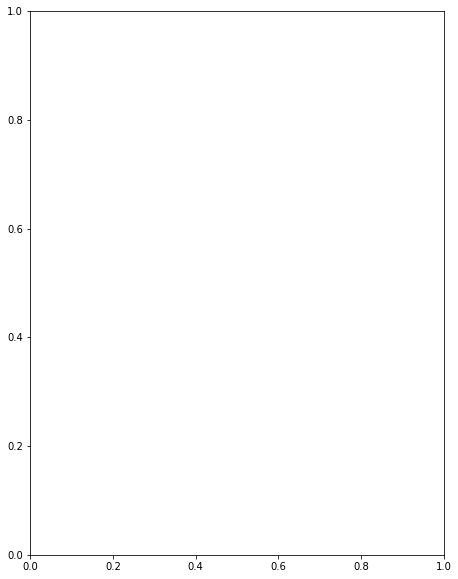

In [41]:
themap.plot(column='combined_od1', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Overdoses"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )